In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('C:/Users/User/jupyter_pr/data_frames/training_mush.csv')

In [8]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [10]:
X = df.drop('class', axis=1)
y = df['class']

In [27]:
rf = RandomForestClassifier(random_state=42)

In [28]:
params = {'n_estimators':range(10, 50, 10),
          'max_depth':range(1, 12, 2),
          'min_samples_leaf':range(1, 7),
          'min_samples_split':range(2, 9, 2)}

In [29]:
best_clf = GridSearchCV(rf, params, cv=3, n_jobs=-1)

In [30]:
best_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [31]:
best_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [32]:
brf = best_clf.best_estimator_

In [112]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance':brf.feature_importances_})

ValueError: arrays must all be same length

In [67]:
feature_importances.sort_values('importance', ascending=False).head()

,feature,importance
4,odor,0.237463
18,ring-type,0.111331
8,gill-color,0.096385
10,stalk-root,0.081268
19,spore-print-color,0.072674


In [37]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [39]:
y_pred = brf.predict(X_test)

In [44]:
y_pred.sum()

976

In [50]:
y_test = pd.read_csv('C:/Users/User/jupyter_pr/data_frames/testing_y_mush.csv')

<AxesSubplot:>

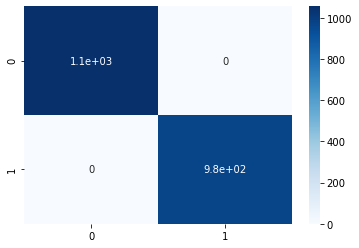

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.Blues)

In [56]:
inv = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [74]:
X_test_inv = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [60]:
inv.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [59]:
X, y = inv.drop('class', axis=1), inv['class']

In [62]:
factors = pd.factorize(y)

In [103]:
factors[1]

Index(['transport', 'fighter', 'cruiser'], dtype='object')

In [66]:
inv_rf = RandomForestClassifier()

In [69]:
params2 = {'criterion':['gini', 'entropy'],
          'n_estimators':range(10, 50, 10),
          'max_depth':range(1, 12, 2),
          'min_samples_leaf':range(1, 7),
          'min_samples_split':range(2, 9, 2)}

In [70]:
grid_inv_rf = GridSearchCV(inv_rf, params2, cv=3)

In [71]:
grid_inv_rf.fit(X, factors[0])

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [72]:
best_inv_clf = grid_inv_rf.best_estimator_

In [107]:
y_pred_inv = pd.DataFrame(best_inv_clf.predict(X_test_inv)) \
    .rename(columns={0:'predictions'}) \
    .replace({0:'transport', 1:'fighter', 2:'cruiser'})

In [109]:
y_pred_inv.value_counts()

predictions
fighter        675
transport      595
cruiser        230
dtype: int64

In [113]:
feature_importances_inv = pd.DataFrame({'feature': X.columns, 'importance':best_inv_clf.feature_importances_})

In [115]:
feature_importances_inv.sort_values('importance', ascending=False)

,feature,importance
3,brightness,0.391257
0,g_reflection,0.197355
5,volume,0.183782
1,i_reflection,0.146422
2,speed,0.081184
4,time_of_observance,0.000000


In [116]:
danger = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

<AxesSubplot:>

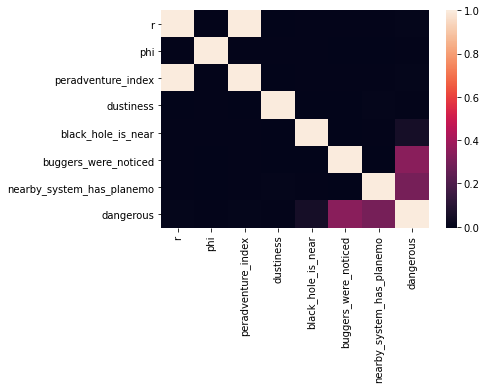

In [119]:
sns.heatmap(danger.corr())